# 1. Load libraries we need for this project

In [401]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import scipy.stats as stats
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [15]:
raw_data=pd.read_csv('case_study.csv')
raw_data.head()

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
1,49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
2,49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
3,49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
4,49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [16]:
# Collect the columns we want to analyze
data1=raw_data[['MENTHLTH','EDUCA']].copy()
data1.head()

,MENTHLTH,EDUCA
0,2.0,6.0
1,88.0,5.0
2,88.0,6.0
3,88.0,6.0
4,88.0,5.0


In [215]:
data1=data1[data1['EDUCA']!=9.0]
data1

,MENTHLTH,EDUCA
0,2.0,6.0
1,0.0,5.0
2,0.0,6.0
3,0.0,6.0
4,0.0,5.0
...,...,...
34540,5.0,4.0
34541,0.0,5.0
34542,0.0,6.0
34543,0.0,2.0


In [216]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

data1['MENTHLTH'] = data1['MENTHLTH'].replace(zero_dict)
data1.head()

,MENTHLTH,EDUCA
0,2.0,6.0
1,0.0,5.0
2,0.0,6.0
3,0.0,6.0
4,0.0,5.0


In [217]:
data1.isnull().sum()

MENTHLTH    634
EDUCA         0
dtype: int64

In [218]:
data2=data1.dropna(axis=0)
data2.head()

,MENTHLTH,EDUCA
0,2.0,6.0
1,0.0,5.0
2,0.0,6.0
3,0.0,6.0
4,0.0,5.0


In [219]:
data2.shape

(33715, 2)

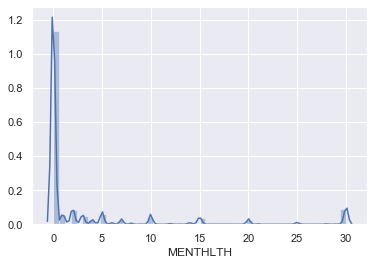

In [402]:
#to check the distribution for mental sickness and education level
sns.distplot(data2['MENTHLTH'])


In [403]:
dist=pd.DataFrame(data2.groupby('EDUCA')['MENTHLTH'].sum()).reset_index()
dist

,EDUCA,MENTHLTH
0,1.0,241.0
1,2.0,4302.0
2,3.0,7211.0
3,4.0,32688.0
4,5.0,31154.0
5,6.0,41170.0


<BarContainer object of 6 artists>

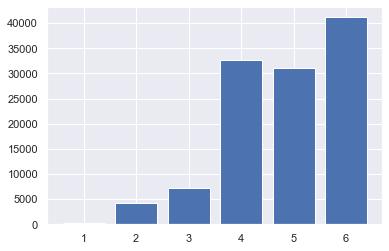

In [404]:
plt.bar(dist['EDUCA'],dist['MENTHLTH'])

# step 2: Create a confidence interval for a sample mean.

In [223]:
# sample mean
sample_mean=data2['MENTHLTH'].mean()
sample_mean

3.463324929556577

In [224]:
# Sandard deviation
sandard_deviation=data2['MENTHLTH'].std()
sandard_deviation

7.751841222237432

In [225]:
# sample size
n=len(data2)

In [226]:
# standard error
sr=sandard_deviation/np.sqrt(n)
sr

0.042217575298559726

In [227]:
# z score at 95% confidence interval
z=stats.norm.ppf(.95)
z

1.6448536269514722

In [228]:
# condident interval for sample mean 
CI1=[sample_mean-z*sr,sample_mean+z*sr]
CI1

[3.393883197705644, 3.53276666140751]

# step 3: Create a confidence interval for a sample proportion.

In [496]:
setp3=data2[data2['MENTHLTH']!=0]
p=len(setp3)/len(data2)
n=len(data2)

In [498]:
p,n

(0.3181669879875426, 33715)

In [493]:
# the propotion who have mental sickness at level 6 of education


In [499]:
CI2=[p-z*np.sqrt((p*(1-p))/n),p+z*np.sqrt((p*(1-p))/n)]
CI2

[0.31399462345194207, 0.32233935252314316]

# Step 4 Perform a two-sample test of means.

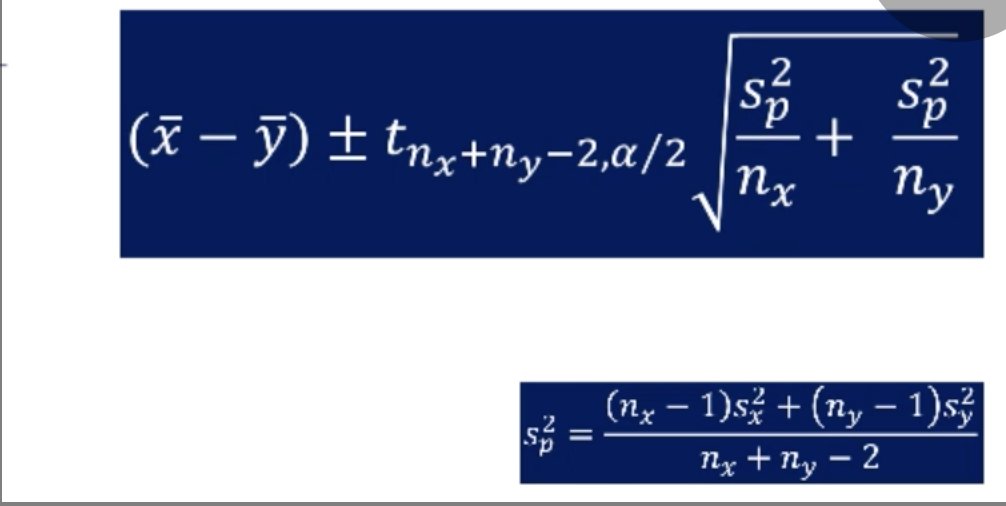

In [232]:
from PIL import Image
myImage = Image.open("two_Sample_mean.png")
myImage

In [233]:
# get the data for level 4 and 5 
level4=data2[data2['EDUCA']==4.0]
level5=data2[data2['EDUCA']==5.0]

In [234]:
#Get the mean for each level data 
mean4=level4['MENTHLTH'].mean()
mean5=level5['MENTHLTH'].mean()
mean4,mean5

(3.9946229989001587, 3.920714825069217)

In [235]:
s4=level4['MENTHLTH'].std()
s5=level5['MENTHLTH'].std()
n4=len(level4)
n5=len(level5)
# to calculate standard deviation
sp=np.sqrt(((n5-1)*(s5**2)+(n4-1)*(s4**2))/(n4+n5-2) )

In [236]:
# to get pooled standard error 
stderr=sp*np.sqrt(1/n5+1/n4)
stderr

0.13168482672415022

In [237]:
# To get t score at 95% significant level with degree of freedom n4+n5-1
t45=stats.t.interval(0.95, df=n5+n4-1)
t45

(-1.96011108562179, 1.96011108562179)

In [238]:
#confidence interval for difference of two means
CI3=[(mean4-mean5)+t45[0]*stderr,(mean4-mean5)+t45[1]*stderr]
CI3

#interpration: we are 95% confident that the actual difference between two populations  
#means of mental sickness people at education level 4 and level 5 is 
#somewhere between -0.184 and 0.332
#TakeAway: means of Level4 and level 5 have no significant difference 

[-0.1842087148392499, 0.3320250625011329]

In [239]:
# null hypothesis is mean4-mean5 =0
cv45=stats.t.ppf(0.95,df=n5+n4-2)
cv45

1.6449481180046768

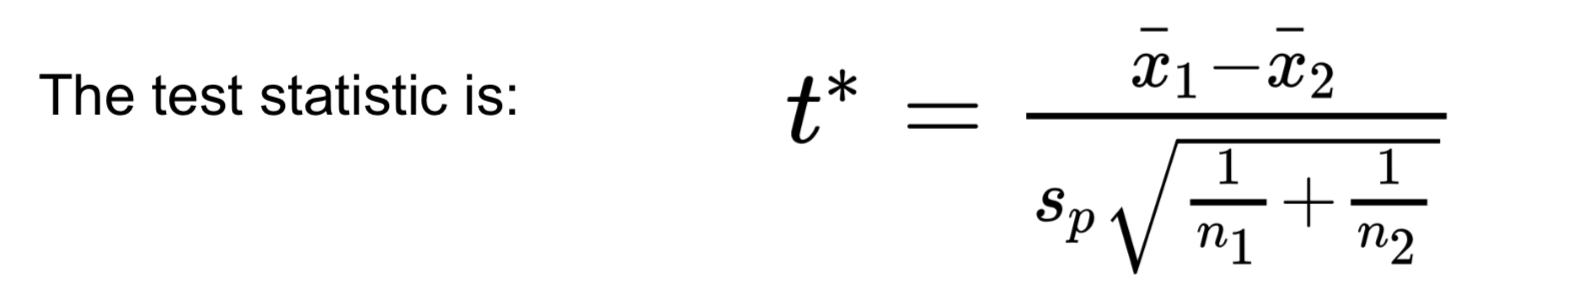

In [240]:
Image.open('t_Test_two_means.png')

In [241]:
t_stats=(mean4-mean5)-0/stderr
t_stats

# we also can compare the t_stats and cv45  :
# we can see t_stats < cv45  so we accept Null Hypothesis

0.0739081738309415

In [242]:
p_value1=stats.t.sf(t_stats,df=n4+n5-2)
p_value1

0.4705421842478243

In [243]:
#compare our cv45 and t_stats
if  p_value1< 0.05:
    print('Reject Null Hypothesis!')
else:
    print('Fail to reject Null Hypothesis!')
    
# that mean population of level 4  equals to that of level 5 

Fail to reject Null Hypothesis!


# Step 4: Perform a one-way ANOVA

In [119]:
data3=data2.copy()

In [120]:
# map different levels
data3['edu']=data3['EDUCA'].map( {1.0:'Level_1',
                                       2.0:'Level_2',
                                       3.0:'Level_3',
                                       4.0:'Level_4',
                                       5.0:'Level_5',
                                       6.0:'Level_6'} )

In [129]:
from statsmodels.formula.api import ols
results=ols('MENTHLTH~edu',data=data3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MENTHLTH   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     66.77
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.17e-69
Time:                        00:32:21   Log-Likelihood:            -1.1672e+05
No. Observations:               33715   AIC:                         2.334e+05
Df Residuals:                   33709   BIC:                         2.335e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4630      1.050      4.251      0.000       2.405       6.521
edu[T.Level_2]     0.2854      1.081      0.264      0.792      -1.833       2.403
edu[T.Level_3]     0.9834      1.071      0.918      0.359      -1.116       3.083
edu[T.Level_4]    -0.4683      1.053     -0.445      0.657      -2.533       1.596
edu[T.Level_5]    -0.5422      1.053     -0.515      0.607      -2.607       1.522
edu[T.Level_6]    -1.7725      1.052     -1.685      0.092      -3.834       0.289
==============================================================================
Omnibus:                    16605.297   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75295.823
Skew:                           2.512   Prob(JB):                         0.00
Kurtosis:                       8.325   Cond. No.                         70.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# examine the anova table 
anova_table = sm.stats.anova_lm(results, type=2) # type=2 means ?
print(anova_table)

               df        sum_sq      mean_sq          F        PR(>F)
edu           5.0  1.986815e+04  3973.629616  66.771848  1.168778e-69
Residual  33709.0  2.006041e+06    59.510554        NaN           NaN


# step 5 :  set up dummy for people who mentally sick 0 week  within oneweek two week.......


In [354]:
b=raw_data[raw_data['INCOME2']!=77.0]
B=b[b['INCOME2']!=99.0][['MENTHLTH','INCOME2']]
C=B[B['MENTHLTH']!=88]
c=C[C['MENTHLTH']!=99]
d=c.dropna(axis=0).reset_index().drop(columns='index')
d.isnull().sum()

MENTHLTH    0
INCOME2     0
dtype: int64

In [288]:
data3.iloc[2]

MENTHLTH           0
EDUCA              6
edu_dummy    Level_6
edu          Level_6
Name: 2, dtype: object

In [329]:
#seprate mental sickdays by weeks

In [309]:
sick_week=[]
for i in data3['MENTHLTH']:
    if i==0:
        i='zero_week'
        sick_week.append(i)
    elif i>=1 and i<=7:
        i='two_week'
        sick_week.append(i)
    elif i>=8 and i<=14:
        i='three_week'
        sick_week.append(i)
    elif i>=15:
        i='more_than_three_week'
        sick_week.append(i)
    
data3['sick_week']=sick_week        

In [330]:
a=data3.drop(columns='edu')
a.head()

,MENTHLTH,EDUCA,edu_dummy,sick_week
0,2.0,6.0,Level_6,two_week
1,0.0,5.0,Level_5,zero_week
2,0.0,6.0,Level_6,zero_week
3,0.0,6.0,Level_6,zero_week
4,0.0,5.0,Level_5,zero_week


In [384]:
plot=pd.DataFrame(data3.groupby('sick_week')['MENTHLTH'].count()).reset_index()
plot

,sick_week,MENTHLTH
0,more_than_three_week,3430
1,three_week,1261
2,two_week,6082
3,zero_week,23119


Text(0.5, 1.0, 'Distribition of mental sick week')

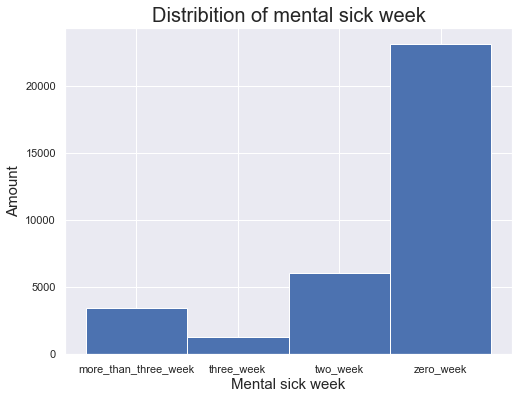

In [406]:
plt.figure(figsize=(8,6))
plt.bar(plot['sick_week'],plot['MENTHLTH'],width=1)
plt.xlabel('Mental sick week',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.title('Distribition of mental sick week',fontsize=20)

numpy.float64

In [319]:
table = pd.pivot_table(a, values='MENTHLTH', index=['edu_dummy'], 
                       columns=['sick_week'], aggfunc='count')

In [320]:
len(a[a['MENTHLTH']=='Level_1']['MENTHLTH'])

0

In [321]:
table

sick_week,more_than_three_week,three_week,two_week,zero_week
edu_dummy,,,,
Level_1,8,2,7,37
Level_2,143,25,138,600
Level_3,218,67,214,825
Level_4,1001,311,1258,5613
Level_5,906,365,1455,5220
Level_6,1136,484,2989,10693


In [324]:
stat,p,dof,expected=chi2_contingency(table)
stat,p,dof,expected

(359.36327635482587,
 2.308373698341673e-67,
 15,
 array([[5.46486727e+00, 2.00848287e+00, 9.70766721e+00, 3.68189826e+01],
        [9.16883286e+01, 3.36978793e+01, 1.62873083e+02, 6.17740709e+02],
        [1.33990449e+02, 4.92450245e+01, 2.38017618e+02, 9.02746908e+02],
        [8.28129794e+02, 3.04359543e+02, 1.47107113e+03, 5.57943954e+03],
        [8.04145099e+02, 2.95544535e+02, 1.42846525e+03, 5.41784511e+03],
        [1.54858146e+03, 5.69144535e+02, 2.75086525e+03, 1.04334087e+04]]))

In [325]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=15
[[5.46486727e+00 2.00848287e+00 9.70766721e+00 3.68189826e+01]
 [9.16883286e+01 3.36978793e+01 1.62873083e+02 6.17740709e+02]
 [1.33990449e+02 4.92450245e+01 2.38017618e+02 9.02746908e+02]
 [8.28129794e+02 3.04359543e+02 1.47107113e+03 5.57943954e+03]
 [8.04145099e+02 2.95544535e+02 1.42846525e+03 5.41784511e+03]
 [1.54858146e+03 5.69144535e+02 2.75086525e+03 1.04334087e+04]]


In [326]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
critical

24.995790139728616

In [327]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=24.996, stat=359.363
Dependent (reject H0)


In [328]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


# Mentally sick days VS income level 

In [358]:
sick_week1=[]
for i in d['MENTHLTH']:
    if i==0:
        i='zero_week'
        sick_week1.append(i)
    elif i>=1 and i<=7:
        i='two_week'
        sick_week1.append(i)
    elif i>=8 and i<=14:
        i='three_week'
        sick_week1.append(i)
    elif i>=15:
        i='more_than_three_week'
        sick_week1.append(i)
    
d['sick_week']=sick_week1        

In [359]:
d

,MENTHLTH,INCOME2,sick_week
0,2.0,7.0,two_week
1,2.0,4.0,two_week
2,10.0,2.0,three_week
3,10.0,8.0,three_week
4,30.0,4.0,more_than_three_week
...,...,...,...
9410,5.0,6.0,two_week
9411,25.0,8.0,more_than_three_week
9412,5.0,5.0,two_week
9413,5.0,4.0,two_week


In [361]:
table1 = pd.pivot_table(d, values='MENTHLTH', index=['INCOME2'], 
                       columns=['sick_week'], aggfunc='count')
table1

sick_week,more_than_three_week,three_week,two_week
INCOME2,,,
1.0,324,90,227
2.0,248,73,219
3.0,318,74,349
4.0,358,98,389
5.0,332,121,442
6.0,350,119,597
7.0,353,153,760
8.0,822,355,2244


In [362]:
len(data3)

33892

# Age VS Mental sickness

In [412]:
#check if there are any missing values
raw_data[['MENTHLTH','_AGE_G']].isnull().sum()

MENTHLTH    0
_AGE_G      0
dtype: int64

In [424]:
# for MENTHLTH  value 7
age_data1=raw_data[['MENTHLTH','_AGE_G']].copy()

zero_dict1 = {88:0, 
            77: np.nan,
            99: np.nan}

age_data1['MENTHLTH'] = am_data1['MENTHLTH'].replace(zero_dict1)
age_data=age_data1.dropna(axis=0).copy()

In [425]:
age_data

,MENTHLTH,_AGE_G
0,2.0,2.0
1,0.0,4.0
2,0.0,1.0
3,0.0,5.0
4,0.0,5.0
...,...,...
34540,5.0,4.0
34541,0.0,3.0
34542,0.0,2.0
34543,0.0,6.0


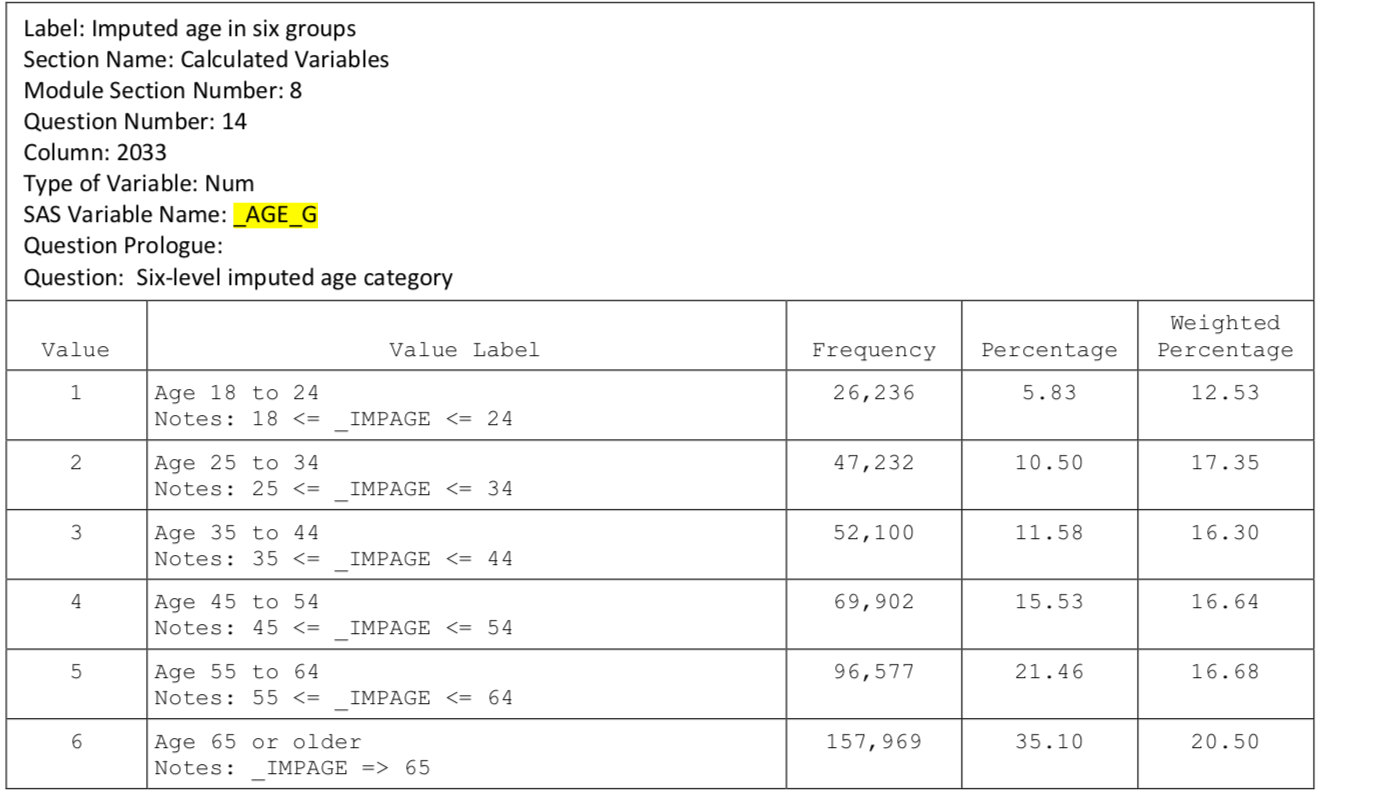

In [426]:
Image.open('age.png')

In [431]:
age_data['age']=age_data['_AGE_G'].map({1.0:'age_18-14',
                                        2.0:'age_25-34',
                                       3.0:'age_35-44',
                                       4.0:'age_45-54',
                                       5.0:'age_55-64',
                                       6.0:'age>65'})

In [435]:
age_dummy=[]
for i in age_data['_AGE_G']:
    if i ==1.0 or i==2.0 or i==3.0:
        i=1
        age_dummy.append(i)
    else:
        i=0
        age_dummy.append(i)

age_data['age_dummy']=age_dummy

In [442]:
sample1=age_data[age_data['age_dummy']==1]
sample2=age_data[age_data['age_dummy']==0]
sample1

,MENTHLTH,_AGE_G,age,age_dummy
0,2.0,2.0,age_25-34,1
2,0.0,1.0,age_18-14,1
7,2.0,3.0,age_35-44,1
9,0.0,3.0,age_35-44,1
10,0.0,3.0,age_35-44,1
...,...,...,...,...
34538,0.0,3.0,age_35-44,1
34539,0.0,2.0,age_25-34,1
34541,0.0,3.0,age_35-44,1
34542,0.0,2.0,age_25-34,1


In [451]:
x1=len(sample1[sample1['MENTHLTH']!=0])
x2=len(sample2[sample2['MENTHLTH']!=0])
x1,x2

(3756, 7017)

In [460]:
N0=len(sample1)
N1=len(sample2)
N0,N1

(8877, 25015)

In [437]:
age_data['age_dummy'].value_counts(normalize=True)

0    0.73808
1    0.26192
Name: age_dummy, dtype: float64

In [440]:
age_data['age_dummy'].value_counts()

0    25015
1     8877
Name: age_dummy, dtype: int64

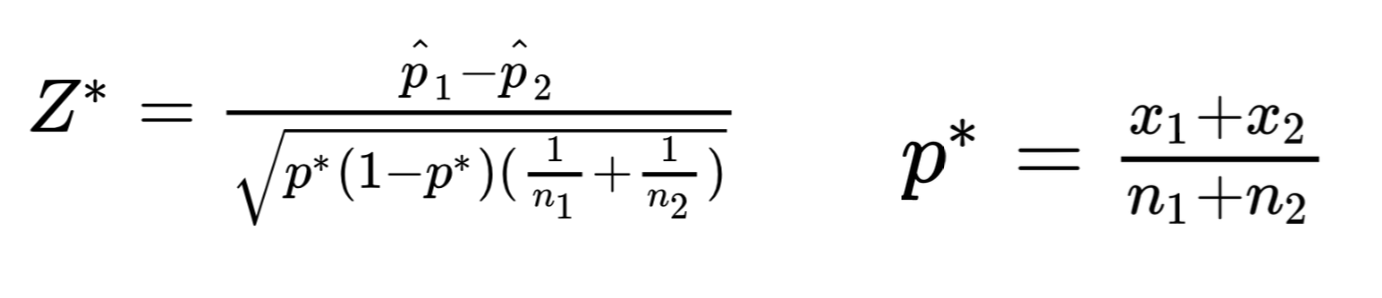

In [438]:
Image.open('two_sample_propotion.png')

In [461]:
p0=0.73808
p1=0.26192


In [467]:
p_star2=(x1+x2)/(N0+N1)
p_star2

0.3178626224477753

In [472]:
z_star2= (p0-p1)/np.sqrt(p_star2*(1-p_star2)*(1/N0+1/N1))

In [473]:
z_star2

82.77172754419968

In [474]:
# Null Hypothesis : the proportions of people aged 18-44 and over 45 are same

In [477]:
p_value3= stats.norm.sf(abs(z_star2))*2
p_value3

0.0

In [478]:
if p_value3 < 0.05:
    print(" At 5% significance level \n Reject the null hypothesis")
    
if p_value3 < 0.01:
    print(" At 1% significance level \n Reject the null hypothesis")
    

 At 5% significance level 
 Reject the null hypothesis
 At 1% significance level 
 Reject the null hypothesis


In [503]:
data4=data3[['edu_dummy','MENTHLTH']]

In [504]:
data_with_dummies = pd.get_dummies(data4, drop_first=True)
data_with_dummies

,MENTHLTH,edu_dummy_Level_2,edu_dummy_Level_3,edu_dummy_Level_4,edu_dummy_Level_5,edu_dummy_Level_6
0,2.0,0,0,0,0,1
1,0.0,0,0,0,1,0
2,0.0,0,0,0,0,1
3,0.0,0,0,0,0,1
4,0.0,0,0,0,1,0
...,...,...,...,...,...,...
34540,5.0,0,0,1,0,0
34541,0.0,0,0,0,1,0
34542,0.0,0,0,0,0,1
34543,0.0,1,0,0,0,0


In [505]:
data_with_dummies.columns

Index(['MENTHLTH', 'edu_dummy_Level_2', 'edu_dummy_Level_3',
       'edu_dummy_Level_4', 'edu_dummy_Level_5', 'edu_dummy_Level_6'],
      dtype='object')

In [506]:
x=data_with_dummies[['edu_dummy_Level_2', 'edu_dummy_Level_3',
       'edu_dummy_Level_4', 'edu_dummy_Level_5', 'edu_dummy_Level_6']]
y=data_with_dummies['MENTHLTH']

In [508]:
x1=sm.add_constant(x)
sm.OLS(y,x1).fit().summary()

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MENTHLTH   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     66.60
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.77e-69
Time:                        16:48:26   Log-Likelihood:            -1.1735e+05
No. Observations:               33892   AIC:                         2.347e+05
Df Residuals:                   33886   BIC:                         2.348e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7965      0.508      7.476      0.000       2.801       4.792
edu_dummy_Level_2     0.9518      0.569      1.673      0.094      -0.163       2.067
edu_dummy_Level_3     1.6498      0.550      2.998      0.003       0.571       2.729
edu_dummy_Level_4     0.1981      0.515      0.385      0.700      -0.811       1.207
edu_dummy_Level_5     0.1242      0.515      0.241      0.810      -0.886       1.134
edu_dummy_Level_6    -1.1060      0.512     -2.162      0.031      -2.109      -0.103
==============================================================================
Omnibus:                    16690.541   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75643.469
Skew:                           2.512   Prob(JB):                         0.00
Kurtosis:                       8.322   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""